In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Admission_Predict.csv")

In [3]:
## Display Top 5 Rows

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
## Check last 5 Rows of the dataset

In [6]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [7]:
## No.of rows and no.of Columns
data.shape

(400, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [9]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
## Overall Statistics 
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
# Dropping Irrelevant features
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
data=data.drop("Serial No.",axis=1)

In [13]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
# Store the feature matrix in x and response(Target Variable in Vector Y)
data.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [15]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [16]:
# For only independent variable drop the target variable
X=data.drop("Chance of Admit ",axis=1)

In [17]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [18]:
# Store the target variable in Y
Y=data["Chance of Admit "]

In [19]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [20]:
## Splitting the dataset into Training and Testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [21]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [22]:
# Feature Scaling
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [24]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
X_train

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

In [26]:
## Import the Model
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
# Model Training
lr=LinearRegression()
lr.fit(X_train,Y_train)

svm=SVR()
svm.fit(X_train,Y_train)

rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

gr=GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [29]:
# Predicting on Test Dataset
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gr.predict(X_test)

In [30]:
# Evaluating the Algorithm
from sklearn import metrics
score1=metrics.r2_score(Y_test,y_pred1)
score2=metrics.r2_score(Y_test,y_pred2)
score3=metrics.r2_score(Y_test,y_pred3)
score4=metrics.r2_score(Y_test,y_pred4)

In [31]:
print(score1,score2,score3,score4)

0.8212082591486991 0.7597814848647668 0.8019944442259459 0.797939675954695


In [32]:
final_data=pd.DataFrame({"Models":["LR","SVR","RF","GR"],
                        "R2_SCORE":[score1,score2,score3,score4]})

In [33]:
final_data

,Models,R2_SCORE
0,LR,0.821208
1,SVR,0.759781
2,RF,0.801994
3,GR,0.797940


<Axes: xlabel='Models', ylabel='R2_SCORE'>

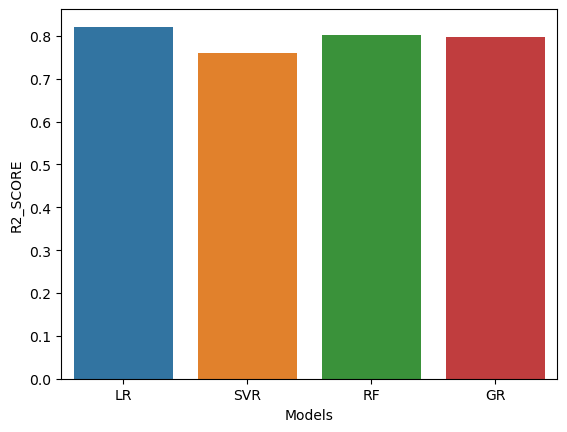

In [34]:
import seaborn as sns
sns.barplot(x=final_data["Models"],y=final_data["R2_SCORE"])

In [35]:
# Classification

In [36]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [37]:
import numpy as np
Y_train= [1 if value>0.8 else 0 for value in Y_train]
Y_test= [1 if value>0.8 else 0 for value in Y_test]

In [38]:
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [39]:
Y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [47]:
# Import the Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [48]:
## Model Training and Evaluation

lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_pred1=lr.predict(X_test)
print(accuracy_score(Y_test,y_pred1))

0.925


In [49]:
svm=svm.SVC()
svm.fit(X_train,Y_train)
y_pred2=svm.predict(X_test)
print(accuracy_score(Y_test,y_pred2))

0.925


In [51]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred3=knn.predict(X_test)
print(accuracy_score(Y_test,y_pred3))

0.8875


In [52]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred4=rf.predict(X_test)
print(accuracy_score(Y_test,y_pred4))

0.95


In [54]:
gr=GradientBoostingClassifier()
gr.fit(X_train,Y_train)
y_pred5=gr.predict(X_test)
print(accuracy_score(Y_test,y_pred5))

0.975


In [58]:
# Visualization
final=pd.DataFrame({"Models":["LR","SVC","KNN","RF","GBC"],
                   "ACC_SCORE":[accuracy_score(Y_test,y_pred1),
                               accuracy_score(Y_test,y_pred2),
                               accuracy_score(Y_test,y_pred3),
                               accuracy_score(Y_test,y_pred4),
                               accuracy_score(Y_test,y_pred5),]})

In [59]:
final

,Models,ACC_SCORE
0,LR,0.9250
1,SVC,0.9250
2,KNN,0.8875
3,RF,0.9500
4,GBC,0.9750


<Axes: xlabel='Models', ylabel='ACC_SCORE'>

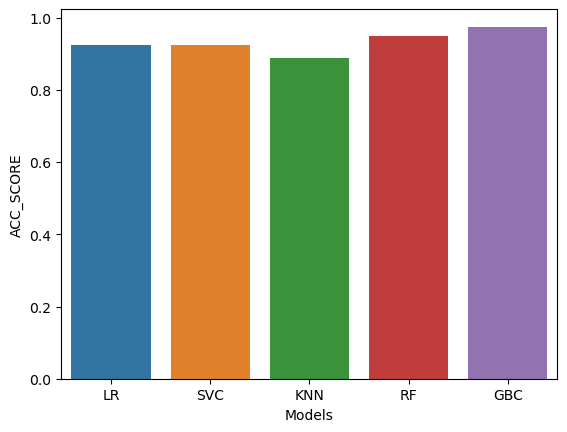

In [62]:
import seaborn as sns
sns.barplot(x=final["Models"],y=final["ACC_SCORE"])

In [63]:
# SAVE BEST MODEL
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [64]:
X=data.drop("Chance of Admit ",axis=1)

In [65]:
Y=data["Chance of Admit "]

In [66]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [68]:
Y=[1 if value>0.8 else 0 for value in Y]

In [70]:
Y=np.array(Y)

In [71]:
Y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [72]:
X=sc.fit_transform(X)

In [73]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [74]:
gr=GradientBoostingClassifier()
gr.fit(X,Y)

GradientBoostingClassifier()

In [75]:
import joblib
joblib.dump(gr,"Admission Model")

['Admission Model']

In [76]:
model=joblib.load("Admission Model")

In [77]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [80]:
# Higher chance of Admission
model.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]]))

E:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [89]:
# GUI
from tkinter import *
import joblib
from sklearn.preprocessing import StandardScaler

In [91]:


def show_entry():
    # Fetching user input from Entry widgets
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    
    # Loading the trained model
    model = joblib.load("Admission Model")  # Ensure the correct file extension (.pkl)
    
    # Transforming user input using the same StandardScaler object
    input_data = sc.transform([[p1, p2, p3, p4, p5, p6, p7]])
    
    # Making prediction
    result = model.predict(input_data)
    
    # Displaying prediction result
    if result == 1:
        Label(master, text="High Chance of getting Admission").grid(row=8, columnspan=2)
    else:
        Label(master, text="You may get Admission").grid(row=8, columnspan=2)

# Creating the Tkinter window
master = Tk()
master.title("Graduate Admission Analysis and Prediction")

# Label widget for the title
Label(master, text="Graduate Admission Analysis and Prediction", fg="red").grid(row=0, columnspan=2)

# Label widgets for input fields
Label(master, text="Enter your GRE Score").grid(row=1)
Label(master, text="Enter your TOEFL Score").grid(row=2)
Label(master, text="Enter University Rating").grid(row=3)
Label(master, text="Enter SOP").grid(row=4)
Label(master, text="Enter LOR").grid(row=5)
Label(master, text="Enter Your CPGA").grid(row=6)
Label(master, text="Research").grid(row=7)

# Entry widgets for user input
e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)

# Button widget to trigger prediction
Button(master, text="Predict", command=show_entry).grid(row=8, columnspan=2)

# Start the Tkinter event loop
mainloop()


E:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
